In [2]:
# Step 1: Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


C:\Users\enisw\AppData\Local\Temp\ipykernel_5048\306533835.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


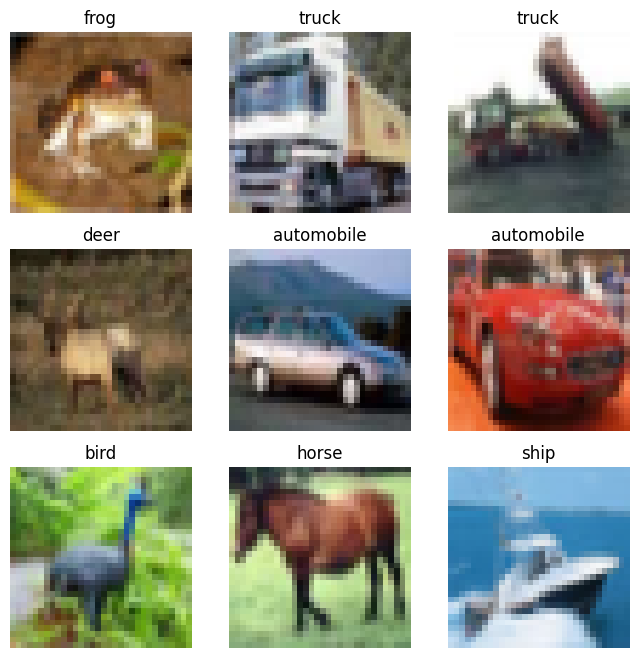

In [3]:
# Step 2: Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

# Visualize some samples
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis("off")
plt.show()

In [4]:
# Step 3: Preprocess
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("x_train shape:", x_train.shape)
print("y_train_cat shape:", y_train_cat.shape)

x_train shape: (50000, 32, 32, 3)
y_train_cat shape: (50000, 10)


In [5]:
# Step 4: Baseline CNN model (no augmentation)
baseline_model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

baseline_model.compile(optimizer="adam",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])

baseline_model.summary()

c:\Users\enisw\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Step 5: Train baseline model
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("cifar10_baseline.h5", save_best_only=True, monitor="val_loss")

history_baseline = baseline_model.fit(
    x_train, y_train_cat,
    validation_split=0.2,
    epochs=15,
    batch_size=128,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2711 - loss: 1.9599

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2714 - loss: 1.9592 - val_accuracy: 0.5157 - val_loss: 1.3986
Epoch 2/15
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4606 - loss: 1.4798

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4607 - loss: 1.4795 - val_accuracy: 0.5689 - val_loss: 1.2420
Epoch 3/15
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5265 - loss: 1.3241

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5266 - loss: 1.3238 - val_accuracy: 0.6052 - val_loss: 1.1275
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5624 - loss: 1.2271

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5624 - loss: 1.2271 - val_accuracy: 0.6263 - val_loss: 1.0750
Epoch 5/15
302/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5935 - loss: 1.1440

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5935 - loss: 1.1440 - val_accuracy: 0.6477 - val_loss: 1.0128
Epoch 6/15
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6046 - loss: 1.1021

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6047 - loss: 1.1021 - val_accuracy: 0.6420 - val_loss: 1.0061
Epoch 7/15
302/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6293 - loss: 1.0424

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6292 - loss: 1.0428 - val_accuracy: 0.6722 - val_loss: 0.9381
Epoch 8/15
300/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6449 - loss: 0.9961

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6448 - loss: 0.9964 - val_accuracy: 0.6778 - val_loss: 0.9205
Epoch 9/15
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6590 - loss: 0.9672

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6590 - loss: 0.9672 - val_accuracy: 0.6857 - val_loss: 0.9080
Epoch 10/15
300/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6737 - loss: 0.9287

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6735 - loss: 0.9292 - val_accuracy: 0.6884 - val_loss: 0.8928
Epoch 11/15
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6828 - loss: 0.8998

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6828 - loss: 0.8998 - val_accuracy: 0.6916 - val_loss: 0.8809
Epoch 12/15
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6964 - loss: 0.8635

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6964 - loss: 0.8636 - val_accuracy: 0.7030 - val_loss: 0.8564
Epoch 13/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6956 - loss: 0.8476 - val_accuracy: 0.7023 - val_loss: 0.8585
Epoch 14/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7103 - loss: 0.8113 - val_accuracy: 0.6962 - val_loss: 0.8823
Epoch 15/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7181 - loss: 0.7892 - val_accuracy: 0.7070 - val_loss: 0.8727


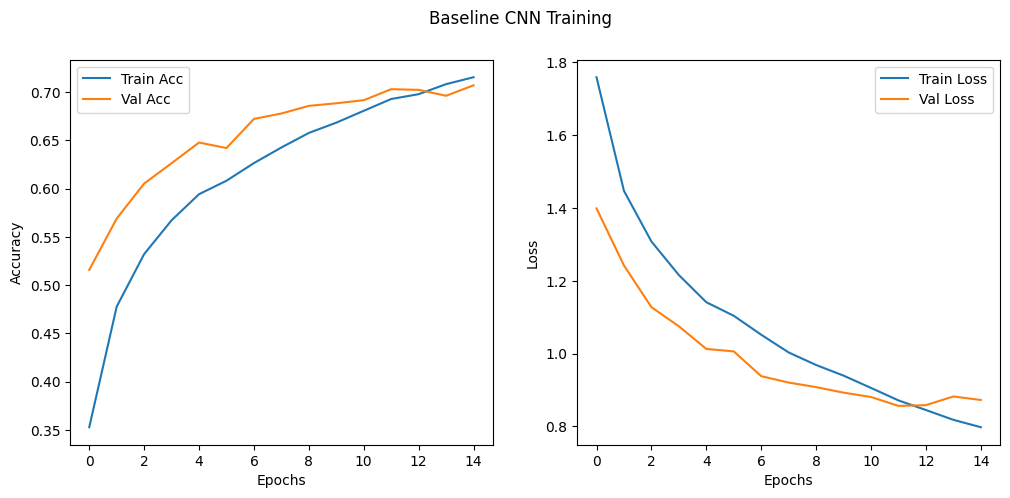

In [7]:
# Step 6: Training curves (baseline)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_baseline.history["accuracy"], label="Train Acc")
plt.plot(history_baseline.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_baseline.history["loss"], label="Train Loss")
plt.plot(history_baseline.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend()

plt.suptitle("Baseline CNN Training")
plt.show()


In [8]:
# Step 7: Evaluate baseline
test_loss, test_acc = baseline_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Baseline Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")


Baseline Test Accuracy: 0.7022, Loss: 0.8564


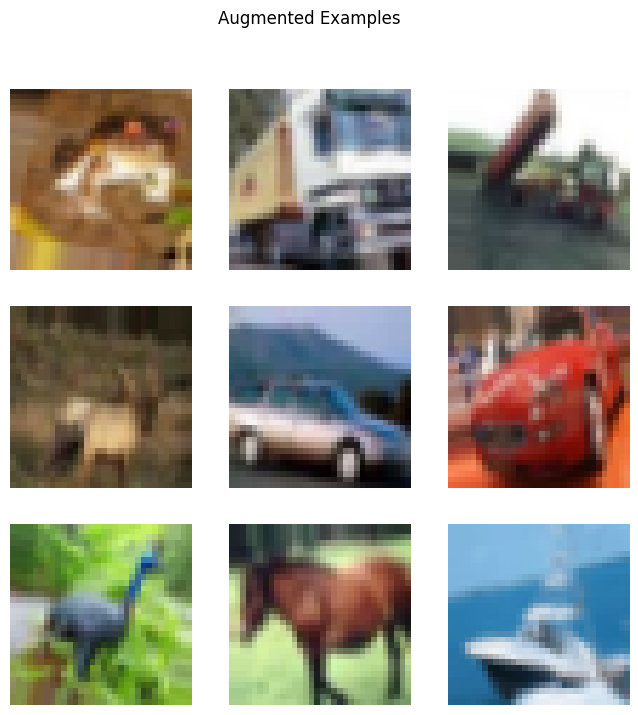

In [9]:
# Step 8: Data Augmentation setup
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train)

# Visualize augmented images
plt.figure(figsize=(8,8))
for x_batch, y_batch in datagen.flow(x_train[:9], y_train_cat[:9], batch_size=9, shuffle=False):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(x_batch[i])
        plt.axis("off")
    plt.suptitle("Augmented Examples")
    plt.show()
    break


In [10]:
# Step 9: CNN model with augmentation (same architecture)
aug_model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

aug_model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])


In [11]:
# Step 10: Train with augmentation
checkpoint_aug = ModelCheckpoint("cifar10_aug.h5", save_best_only=True, monitor="val_loss")

history_aug = aug_model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=128),
    validation_data=(x_test, y_test_cat),
    epochs=30,
    callbacks=[early_stop, checkpoint_aug],
    verbose=1
)


Epoch 1/30


c:\Users\enisw\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2696 - loss: 1.9691

391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.2698 - loss: 1.9686 - val_accuracy: 0.4821 - val_loss: 1.4356
Epoch 2/30
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4219 - loss: 1.5821

391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.4220 - loss: 1.5820 - val_accuracy: 0.5295 - val_loss: 1.2863
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4679 - loss: 1.4638

391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.4680 - loss: 1.4638 - val_accuracy: 0.5697 - val_loss: 1.2166
Epoch 4/30
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4969 - loss: 1.3948

391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4969 - loss: 1.3947 - val_accuracy: 0.6068 - val_loss: 1.1138
Epoch 5/30
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5115 - loss: 1.3520

391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5116 - loss: 1.3519 - val_accuracy: 0.6172 - val_loss: 1.0712
Epoch 6/30
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5313 - loss: 1.3006

391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5313 - loss: 1.3006 - val_accuracy: 0.6341 - val_loss: 1.0261
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5473 - loss: 1.2658 - val_accuracy: 0.6380 - val_loss: 1.0336
Epoch 8/30
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5577 - loss: 1.2432

391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5577 - loss: 1.2431 - val_accuracy: 0.6483 - val_loss: 0.9991
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5687 - loss: 1.2193

391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5687 - loss: 1.2193 - val_accuracy: 0.6549 - val_loss: 0.9738
Epoch 10/30
389/391 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5745 - loss: 1.1996

391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5746 - loss: 1.1996 - val_accuracy: 0.6636 - val_loss: 0.9549
Epoch 11/30
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5782 - loss: 1.1863

391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5782 - loss: 1.1863 - val_accuracy: 0.6749 - val_loss: 0.9336
Epoch 12/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5908 - loss: 1.1596 - val_accuracy: 0.6658 - val_loss: 0.9574
Epoch 13/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5916 - loss: 1.1478

391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5916 - loss: 1.1478 - val_accuracy: 0.6890 - val_loss: 0.9080
Epoch 14/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5988 - loss: 1.1316 - val_accuracy: 0.6817 - val_loss: 0.9122
Epoch 15/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6065 - loss: 1.1169 - val_accuracy: 0.6734 - val_loss: 0.9429
Epoch 16/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6097 - loss: 1.1031

391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6097 - loss: 1.1031 - val_accuracy: 0.7022 - val_loss: 0.8483
Epoch 17/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6131 - loss: 1.0961 - val_accuracy: 0.6828 - val_loss: 0.9143
Epoch 18/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6200 - loss: 1.0834

391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6200 - loss: 1.0833 - val_accuracy: 0.7066 - val_loss: 0.8427
Epoch 19/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6295 - loss: 1.0603 - val_accuracy: 0.7100 - val_loss: 0.8598
Epoch 20/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6315 - loss: 1.0485 - val_accuracy: 0.7014 - val_loss: 0.8579
Epoch 21/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6331 - loss: 1.0431 - val_accuracy: 0.7075 - val_loss: 0.8528


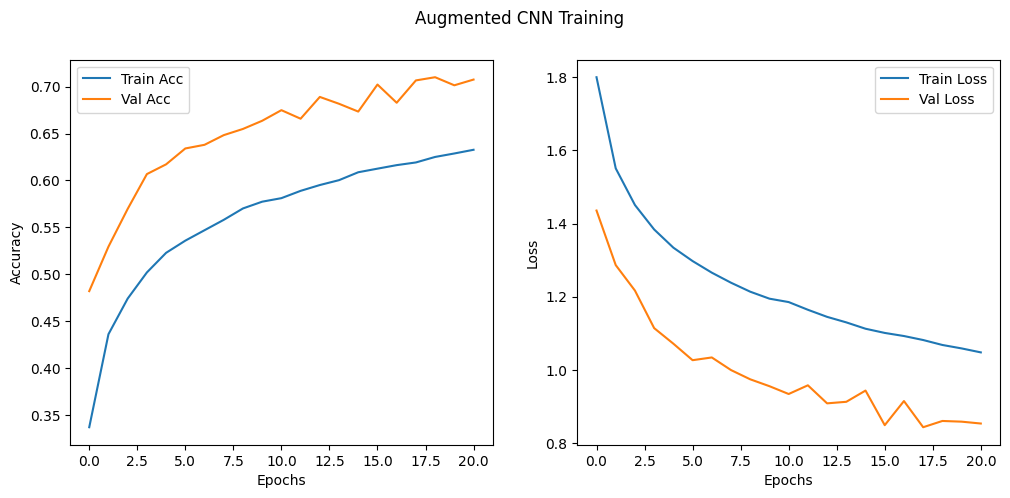

In [12]:
# Step 11: Training curves (augmented)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_aug.history["accuracy"], label="Train Acc")
plt.plot(history_aug.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_aug.history["loss"], label="Train Loss")
plt.plot(history_aug.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend()

plt.suptitle("Augmented CNN Training")
plt.show()

In [13]:
# Step 12: Evaluate augmented model
test_loss_aug, test_acc_aug = aug_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Augmented Test Accuracy: {test_acc_aug:.4f}, Loss: {test_loss_aug:.4f}")


Augmented Test Accuracy: 0.7066, Loss: 0.8427


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step


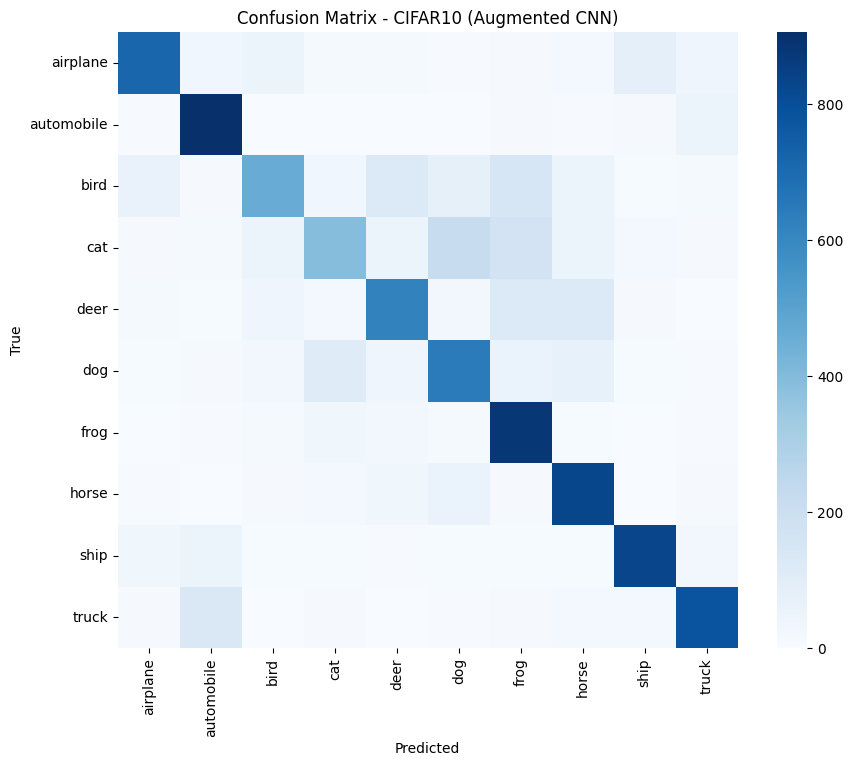

              precision    recall  f1-score   support

    airplane       0.81      0.71      0.76      1000
  automobile       0.77      0.91      0.83      1000
        bird       0.68      0.46      0.55      1000
         cat       0.60      0.39      0.47      1000
        deer       0.66      0.62      0.64      1000
         dog       0.60      0.65      0.62      1000
        frog       0.61      0.88      0.72      1000
       horse       0.69      0.83      0.76      1000
        ship       0.83      0.83      0.83      1000
       truck       0.81      0.78      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [14]:
# Step 13: Confusion Matrix (augmented model)
y_pred = aug_model.predict(x_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted"); plt.ylabel("True")
plt.title("Confusion Matrix - CIFAR10 (Augmented CNN)")
plt.show()

print(classification_report(y_test, y_pred, target_names=class_names))


Model Performance Comparison
Baseline CNN   → Accuracy: 0.7022, Loss: 0.8564
Augmented CNN  → Accuracy: 0.7066, Loss: 0.8427


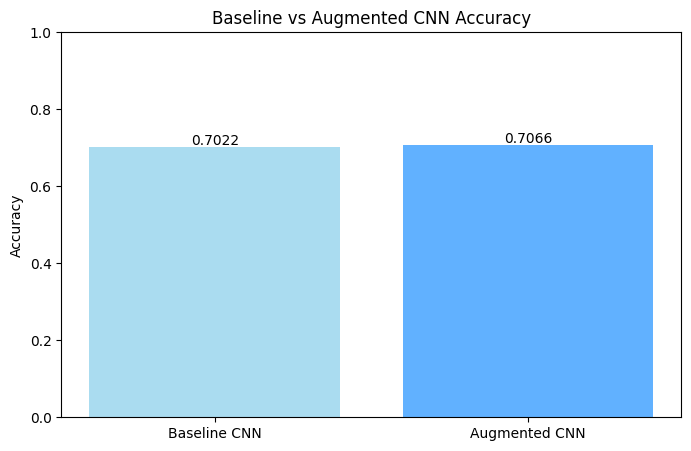

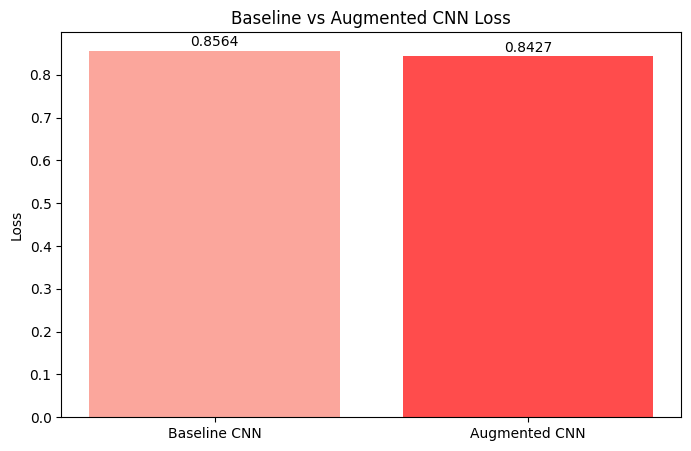

In [16]:
# Step 14: Compare baseline vs augmented model
print("Model Performance Comparison")
print(f"Baseline CNN   → Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")
print(f"Augmented CNN  → Accuracy: {test_acc_aug:.4f}, Loss: {test_loss_aug:.4f}")

import matplotlib.pyplot as plt

models = ["Baseline CNN", "Augmented CNN"]
accuracies = [test_acc, test_acc_aug]
losses = [test_loss, test_loss_aug]

plt.figure(figsize=(8,5))

# Accuracy bars
plt.bar(models, accuracies, color=["skyblue", "dodgerblue"], alpha=0.7)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.4f}", ha="center", fontsize=10)

plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Baseline vs Augmented CNN Accuracy")
plt.show()

# Loss bars
plt.figure(figsize=(8,5))
plt.bar(models, losses, color=["salmon", "red"], alpha=0.7)
for i, v in enumerate(losses):
    plt.text(i, v + 0.01, f"{v:.4f}", ha="center", fontsize=10)

plt.ylabel("Loss")
plt.title("Baseline vs Augmented CNN Loss")
plt.show()
